# Project 1 Fall 2023

Srinivas Dengle

In [208]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import math


# 1. Loading Data & Basic Exploration

a) Load the data from the given path into a pandas DataFrame.

b) How many rows are there in the dataset? <br>
---> 649 rows and 33 columns before data transformation.

In [209]:
# reading the CSV file
cd = pd.read_csv("student-por.csv")
cd.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [210]:
# Creating a new dataframe with just G1, G2, and G3 columns
total_mark = cd[["G1", "G2", "G3"]]
total_mark

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


# 2. Data Transformation

a) Combine the grades G1, G2, and G3 into a column called total_mark.

b) Create a new binary column called pass. If the total mark is below 35 for G1, G2, and G3, it should be labeled as 0 (fail), else 1 (pass).

c) Drop the columns G1, G2, G3, and total_mark.

d) How many columns are left after this operation? <br>
---> 31 columns

e) How many students are in the data set? <br>
---> 649 Students

f) How many students passed? <br>
---> 328 students passed

g) Discuss the data distribution. <br>
---> More than half of the students failed if we compare it to the number of students passed. 


In [211]:
# created a new column called total mark to store the total of G1, G2 and G3
total_mark = cd['G1'] + cd['G2'] + cd["G3"]
total_mark

0      22
1      31
2      37
3      42
4      37
       ..
644    31
645    46
646    32
647    30
648    32
Length: 649, dtype: int64

In [212]:
# assigning the values to the students who passed and failed

# Creating an empty list
pass_fail = []

for i in total_mark:
    if i >= 35:
        pass_fail.append(1)
    else:
        pass_fail.append(0)


In [213]:
pd.DataFrame(pass_fail)

,0
0,0
1,0
2,1
3,1
4,1
...,...
644,0
645,1
646,0
647,0


In [214]:
# Created a new dataframe called pass
df = pd.DataFrame({'pass': pass_fail})
df

,pass
0,0
1,0
2,1
3,1
4,1
...,...
644,0
645,1
646,0
647,0


In [215]:
# concatanating pass df to the orignal df
new_df = pd.concat([cd,df], axis=1)
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0


In [216]:
# dropping G1, G2, and G3 columns
new_df.drop(["G1", "G2", "G3"], axis=1, inplace=True)
new_df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,0


In [217]:
# calculating the sume of how many students passed
pass_count = (df['pass'] == 1).sum()
print(f"Number of Students passed: {pass_count}")

Number of Students passed: 328


# 3. One-Hot Encoding

a) Create a list called mylist for the categorical data.

b) Convert the categorical columns provided in the mylist variable into one-hot encoded columns. This will be useful when we build the decision tree.

In [218]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [219]:
new_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')

In [220]:
# List of categorical columns
my_list = ['school', 'sex','address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian'
           , 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']
# converting categorical columns 
df_encoded = pd.get_dummies(new_df, columns=my_list)

# Print the results
print(df_encoded)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         0       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
644   19     2     3           1          3         1       5         4   
645   18     3     1           1          2         0       4         3   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   
648   18     3     2           3          1         0       4         4   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0        4     1  

In [221]:
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [222]:
# Checking for the data types of the each columns
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  pass               649 non-null    int64
 14  school_GP          649 non-null    uint8
 15  school_MS          649 non-null    uint8
 16  sex_F              649 non-null    uint8
 17  sex_M           

# 4. Data Splitting

a) Shuffle the dataset and split it into training and test sets. Use the first 500 rows for training and the rest for testing.

b) Separate the features and target variable (pass) for the training and test sets

In [223]:
# Separate the features (X) and target variable (pass) for the training and test sets
X = df_encoded.drop('pass', axis=1)  # Features
y = df_encoded['pass']  # Target variable

# Split the data with 500 for training and rest for testing
train_size = 500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=len(df_encoded) - train_size, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(149, 56)
(500, 56)
(500,)
(149,)


# 5. Building the Decision Tree Model

a) Use a decision tree classifier with criterion entropy and max_depth of 5.

b) Fit the model on the training set.

c) Score your tree.

d) Give a visualization of the decision tree. Ensure the tree's features and class names are appropriately labeled.

e) According to your tree, what are the top two level splitting features?

f) Would Gini be appropriate here as well? Why? <br>
---> Both Gini and entropy are valid criteria for decision trees. Gini measures impurity based on the probability of misclassifying a randomly chosen element. Entropy measures impurity based on the information gain in reducing uncertainty.

Accuracy score: 0.5973154362416108


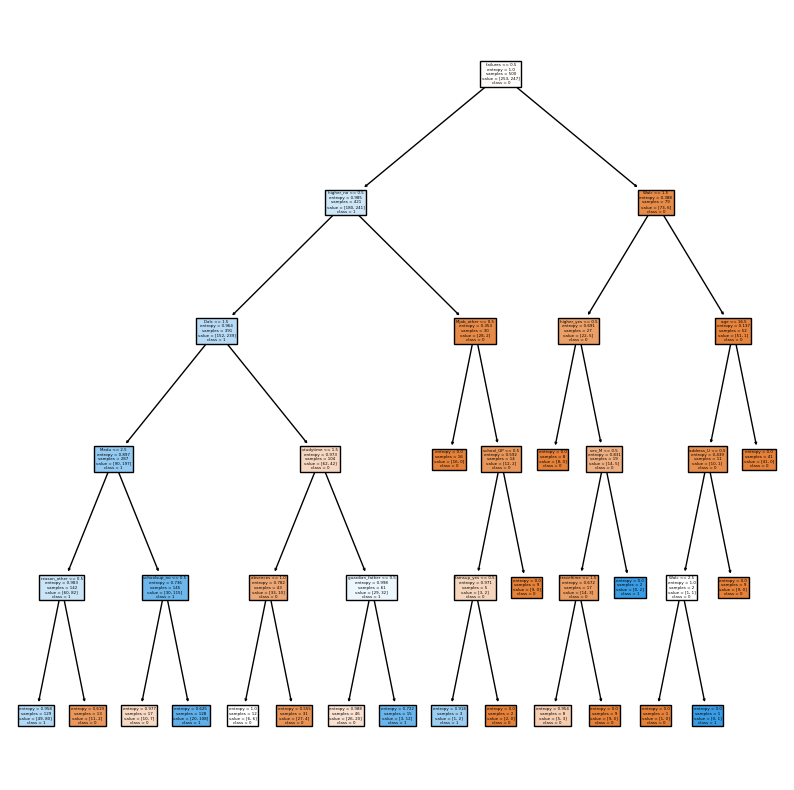

Top two level splitting features: Index(['failures', 'higher_no'], dtype='object')


In [225]:
# creating a function entropy
def entropy(X_test, X_train, y_train, y_test):
    """
    This function uses the entropy for criterion and a max depth of 5 and plots a tree.
    """
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
    tree.fit(X_train, y_train)

    #calculating the tree score
    accuracy = tree.score(X_test, y_test)
    print("Accuracy score:", accuracy)

    # plotting the decision tree
    plt.figure(figsize=(10,10))
    dc_tree = plot_tree(tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
    plt.show()

    # finding out the top features
    top_features = X.columns[tree.feature_importances_.argsort()[::-1][:2]]
    print("Top two level splitting features:", top_features)

    return tree

tree = entropy(X_test, X_train, y_train, y_test)

In [226]:
def gini(X_test, X_train, y_train, y_test):
    """
    Define a function named 'gini' that takes four parameters:
    X_test: Test data for features
    X_train: Training data for features
    y_train: Training data for target labels
    y_test: Test data for target labels
    Creating a DecisionTreeClassifier with Gini impurity as the criterion and a maximum depth of 5.
    """    
    tree1 = DecisionTreeClassifier(criterion="gini", max_depth=5)

    # fitting the tree with training data and finding the accracy of the model on the test data
    tree1.fit(X_train, y_train)
    accuracy = tree1.score(X_test, y_test)
    print("Accuracy score", accuracy)

gini(X_test, X_train, y_train, y_test)

Accuracy score 0.6442953020134228


# 6. Model Evaluation using Cross-Validation

a) Evaluate the model's performance using 5-fold cross-validation. Is accuracy an appropriate metric, why? <br>
---> The accuracy is a appropriate for this use case because the grading category is either pass or fail. Based on the scores the class distribution is relatively balanced, which is a favorable condition for using accuracy.

b) Report the mean accuracy and its +/-variance. <br>
---> Accuracy: 0.6685 (+/- 0.0023)

In [227]:
accuracy_score = cross_val_score(tree, X_train, y_train, cv=5)
# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_score)
print("")

# Calculate and print the mean accuracy score
mean_accuracy = accuracy_score.mean()
print("Mean Accuracy:", mean_accuracy)
print("")

# Calculate and print the variance of accuracy scores
accuracy_variance = accuracy_score.var()
print("Accuracy Variance:", accuracy_variance)

print("")
# Report the results
print(f"Accuracy: {mean_accuracy:.4f} (+/- {accuracy_variance:.4f})")

Accuracy Scores for Each Fold: [0.67 0.74 0.61 0.69 0.65]

Mean Accuracy: 0.6719999999999999

Accuracy Variance: 0.0018559999999999996

Accuracy: 0.6720 (+/- 0.0019)


# 7. Hyperparameter Tuning

a) Test the decision tree classifier with different max depths ranging from 1 to 20.

b) For each depth, evaluate the model using 5-fold cross-validation.

c) Try gini, do you get better results? Do the top splitting features change from question 5f? Include Gini in your grid search.

In [228]:
def tuning(X_train, y_train):
    tree3 = DecisionTreeClassifier()
    # hyperparameter grid including entropy and gini.
    param_grid = {
        'criterion': ['entropy', 'gini'],
        'max_depth': range(1, 21)
    }

    # Creating a grid search
    grid_search = GridSearchCV(estimator=tree3, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Printing the best hyperparameters and accuracy
    best_parameter = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print(f"Best Hyperparameters: {best_parameter}")
    print(f"Best Accuracy: {best_accuracy:.3f}")

    # Evaluating the model for each depth using 5-fold cross-validation
    for depth in range(1, 21):
        tree = DecisionTreeClassifier(criterion=best_parameter['criterion'], max_depth=depth)
        scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
        print(f"Max depth: {depth}, Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


# Calling the function 
tuning(X_train, y_train)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6}
Best Accuracy: 0.686
Max depth: 1, Accuracy: 0.628 (+/- 0.087)
Max depth: 2, Accuracy: 0.648 (+/- 0.098)
Max depth: 3, Accuracy: 0.648 (+/- 0.120)
Max depth: 4, Accuracy: 0.656 (+/- 0.091)
Max depth: 5, Accuracy: 0.674 (+/- 0.055)
Max depth: 6, Accuracy: 0.682 (+/- 0.034)
Max depth: 7, Accuracy: 0.658 (+/- 0.056)
Max depth: 8, Accuracy: 0.650 (+/- 0.072)
Max depth: 9, Accuracy: 0.652 (+/- 0.056)
Max depth: 10, Accuracy: 0.638 (+/- 0.100)
Max depth: 11, Accuracy: 0.646 (+/- 0.098)
Max depth: 12, Accuracy: 0.632 (+/- 0.062)
Max depth: 13, Accuracy: 0.648 (+/- 0.101)
Max depth: 14, Accuracy: 0.648 (+/- 0.097)
Max depth: 15, Accuracy: 0.646 (+/- 0.068)
Max depth: 16, Accuracy: 0.662 (+/- 0.106)
Max depth: 17, Accuracy: 0.652 (+/- 0.111)
Max depth: 18, Accuracy: 0.650 (+/- 0.075)
Max depth: 19, Accuracy: 0.632 (+/- 0.095)
Max depth: 20, Accuracy: 0.644 (+/- 0.113)


Based on the hyperparameter tuning, the accuracy was around 0.686.

# 8. Entropy and Gini

a) Write Python code that calculates the entropy of a dataset D. You may assume that the classes are comprised of integers. Include printouts of the test cases.

Input: List of dataset.

Output: The entropy of the list

Test Cases:
[1,2,2,3,3,3] <br>
[1,1,1,1,1,1,1,1,1,1] <br>
[2,3]<br>

b) Write Python code that calculates the Gini of a non-empty dataset D. You may assume that the classes are comprised of integers. Include the definitions of both Entropy and Gini. Comment your code. Include printouts of the test cases.

Input: List of dataset

Output: Gini of the list

Test Cases:<br>
[1,2,2,3,3,3]<br>
[1,1,1,1,1,1,1,1,1,1]<br>
[2,3]


In [229]:
def entropy(D):
    """
    Calculates the entropy of the dataset.

    """
    # initializing an empty dictonary to count how many times each class occurs
    class_counts1 = {}
    for item in D:
        class_counts1[item] = class_counts1.get(item, 0) + 1

    # Calculating the total number of samples in the dataset using len() function`.
    total_samples = len(D)
    entropy_value = 0

    for c in class_counts1.values():
        probability = c / total_samples
        entropy_value -= probability * math.log2(probability)

    return entropy_value


In [230]:
def gini_impurity(D):
    """
    Calculates the gini impurity of the given dataset.

    """
    # initializing an empty dictonary to count how many times each class occurs
    class_counts = {} 
    for item in D:
        class_counts[item] = class_counts.get(item, 0) + 1

    # Calculating the total number of samples in the dataset using len() function
    total_samples = len(D)
    gini_value = 1

    for ct in class_counts.values():
        probability = ct / total_samples
        gini_value -= probability ** 2

    return gini_value

In [231]:
# the given test Cases
test1 = [1, 2, 2, 3, 3, 3]
tes2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
test3 = [2, 3]

# printing all the results
print("Entropy of dataset1:", entropy(test1))
print("Entropy of dataset2:", entropy(tes2))
print("Entropy of dataset3:", entropy(test3))

print("Gini impurity of dataset1:", gini_impurity(test1))
print("Gini impurity of dataset2:", gini_impurity(tes2))
print("Gini impurity of dataset3:", gini_impurity(test3))

Entropy of dataset1: 1.4591479170272448
Entropy of dataset2: 0.0
Entropy of dataset3: 1.0
Gini impurity of dataset1: 0.6111111111111112
Gini impurity of dataset2: 0.0
Gini impurity of dataset3: 0.5


# Definition:

Entropy: It tells us how impure a collection of data is. 

Gini impurity: It tells us the probablity of a particular variable that is wrongly classified when it is randomly chosen.

# Explaination

Entropy <br>
Dataset1: Moderate disorder due to a mix of classes. <br>
Dataset2: Perfect purity, all values are the same class. <br>
Dataset3: Moderate disorder with two nearly equal classes. <br>

Gini impurity <br>
Dataset1: Moderate impurity due to a mix of classes. <br>
Dataset2: Perfect purity, all values are the same class. <br>
Dataset3: Moderate impurity with two nearly equal classes.

